# 보팅 앙상블
단일 모델을 앙상블하여 더 나은 예측을 하는 앙상블 모델을 만들어 보겠습니다.

In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
import numpy as np
np.random.seed(5)

# 손글씨 데이터 로드

In [2]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2)

# 단일 모델 정확도 측정
의사결정트리, knn, svm 모델의 정확도를 측정합니다.

In [3]:
dtree = tree.DecisionTreeClassifier(
    criterion="gini", max_depth=8, max_features=32,random_state=35)

dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma=0.003,
          probability=True,random_state=35).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [4]:
print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dtree_predicted))
print("knn   : ",accuracy_score(y_test, knn_predicted))
print("svm   : ",accuracy_score(y_test, svm_predicted))

[accuarcy]
d-tree:  0.8277777777777777
knn   :  0.8944444444444445
svm   :  0.8916666666666667


소프트 보팅 또는 하드 보팅은 sklearn의 voting classifier를 사용하여 쉽게 구현할 수 있습니다.  
직접 소프트 보팅을 구현하실 때는 predict_proba 함수를 사용하여 테스트 수행 시 측정된 분류값 별 확률을 사용하시면 됩니다.  
아래 SVM으로부터 나온 테스트 데이터 2개의 0부터 9까지의 확률을 보실 수 있습니다.

In [5]:
svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[0.00129293 0.00434548 0.00446459 0.00248053 0.00336731 0.93848315
  0.00127073 0.00448341 0.02477231 0.01503956]
 [0.00189233 0.00631647 0.92958418 0.00345522 0.0030971  0.00828454
  0.00186869 0.0048112  0.03092707 0.0097632 ]]


# 하드 보팅
하드 보팅은 일반적인 투표와 같이, 각각의 분류기의 예측값들을 모아, 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식입니다.

In [6]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)], 
    weights=[1,1,1], voting='hard').fit(X_train, y_train)
hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.9222222222222223

# 소프트 보팅
소프트 보팅은 각각의 분류모델의 predict_proba을 활용하여, 모든 분류값들의 확률들을 더해서,  
가장 높은 점수를 획득한 분류값으로 최종 결론을 내는 방식입니다.

In [7]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)], 
    weights=[1,1,1], voting='soft').fit(X_train, y_train)
soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.8888888888888888

# 정확도 비교 시각화

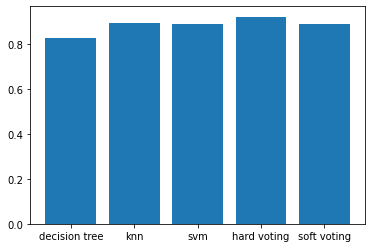

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']);